In [1]:
import pandas as pd
import numpy as np
import json
import os
from plotnine import *
from plotnine.data import *

%matplotlib inline

In [2]:
df = pd.DataFrame(columns={"epoch","accuracy", "sparcity","prune_method","dataset","arch"})
for filename in os.listdir(os.getcwd()):
    if '.txt' in filename:
        with open(os.path.join(os.getcwd(), filename), 'r') as f:
            for l in f:
                pass  
        epoch = 0
        arch = filename.split('cifar')[0]
        if 'cifar100' in filename:
            dataset = 'cifar100'
        else:
            dataset = 'cifar10'
        prune_method = filename.split('Prune')[1].split('11272020.txt')[0]
        for a_tuple in l.strip().split(":")[1][1:-1].split(')'):
            if len(a_tuple) > 2:
                epoch  += 1
                if (a_tuple[0] == ','):
                    a_tuple = a_tuple[2:]
                if a_tuple[0] == '(':
                    a_tuple = a_tuple[1:]
                sparcity, accuracy = a_tuple.split(',')
                df =df.append({"epoch":int(epoch),"accuracy":float(accuracy),"sparcity":float(sparcity),"prune_method":str(prune_method),"dataset":str(dataset),"arch":str(arch)},ignore_index=True)
            
df = df.astype({"epoch": 'int',"accuracy": 'float', "sparcity": 'float',"prune_method":'string',"dataset":'string',"arch":'string'})
df

,prune_method,dataset,sparcity,accuracy,arch,epoch
0,Positive,cifar10,0.000000,86.85,VGG16,1
1,Positive,cifar10,0.000000,79.13,VGG16,2
2,Positive,cifar10,0.000000,68.37,VGG16,3
3,Positive,cifar10,0.096425,90.53,VGG16,4
4,Positive,cifar10,0.192794,91.10,VGG16,5
...,...,...,...,...,...,...
1483,MAGNITUDE+L1,cifar10,1.041667,91.49,RESNET50,27
1484,MAGNITUDE+L1,cifar10,1.041667,91.49,RESNET50,28
1485,MAGNITUDE+L1,cifar10,1.041667,91.49,RESNET50,29
1486,MAGNITUDE+L1,cifar10,1.041667,91.49,RESNET50,30


In [21]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'RESNET50') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'RESNET50') &((df['epoch'] == 31))]]).drop( columns=['arch','dataset','epoch'])
print(dft.to_latex(index=False)) 

\begin{tabular}{lrr}
\toprule
     prune\_method &  sparcity &  accuracy \\
\midrule
         Positive &  0.000000 &     86.89 \\
         Negative &  0.000000 &     86.89 \\
 MAGNITUDE+RANDOM &  0.000000 &     86.89 \\
        MAGNITUDE &  0.000000 &     86.89 \\
        L1+RANDOM &  0.000000 &     86.89 \\
               L1 &  0.000000 &     86.89 \\
           RANDOM &  0.000000 &     86.89 \\
     MAGNITUDE+L1 &  0.000000 &     86.89 \\
         Positive &  0.925926 &     91.69 \\
         Negative &  0.925926 &     91.68 \\
 MAGNITUDE+RANDOM &  1.041667 &     92.09 \\
        MAGNITUDE &  0.925926 &     90.78 \\
        L1+RANDOM &  0.925926 &     92.36 \\
               L1 &  0.925926 &     91.92 \\
           RANDOM &  0.925926 &     92.20 \\
     MAGNITUDE+L1 &  1.041667 &     91.49 \\
\bottomrule
\end{tabular}



In [22]:

dft = pd.concat([df.loc[((df['epoch'] == 1))],df.loc[((df['epoch'] == 31))]])
print(dft.to_latex(index=False)) 


\begin{tabular}{llrrlr}
\toprule
     prune\_method &   dataset &  sparcity &  accuracy &      arch &  epoch \\
\midrule
         Positive &   cifar10 &  0.000000 &     86.85 &     VGG16 &      1 \\
        MAGNITUDE &   cifar10 &  0.000000 &     86.85 &     VGG16 &      1 \\
         Negative &   cifar10 &  0.000000 &     86.85 &     VGG16 &      1 \\
         Positive &   cifar10 &  0.000000 &     86.89 &  RESNET50 &      1 \\
           RANDOM &  cifar100 &  0.000000 &     62.74 &  RESNET50 &      1 \\
         Negative &   cifar10 &  0.000000 &     86.89 &  RESNET50 &      1 \\
        MAGNITUDE &  cifar100 &  0.000000 &     66.13 &     DPN92 &      1 \\
         Positive &  cifar100 &  0.000000 &     62.74 &  RESNET50 &      1 \\
               L1 &   cifar10 &  0.000000 &     88.61 &     DPN92 &      1 \\
        MAGNITUDE &  cifar100 &  0.000000 &     62.74 &  RESNET50 &      1 \\
        L1+RANDOM &  cifar100 &  0.000000 &     66.13 &     DPN92 &      1 \\
         Positive &  

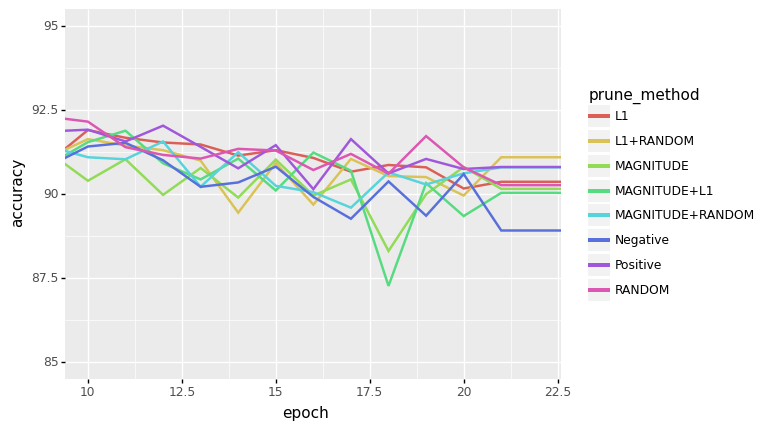

<ggplot: (8775661773081)>

In [111]:
dft = df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'VGG16')]
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01)+ coord_cartesian(xlim=(10,22), ylim = (85,95))

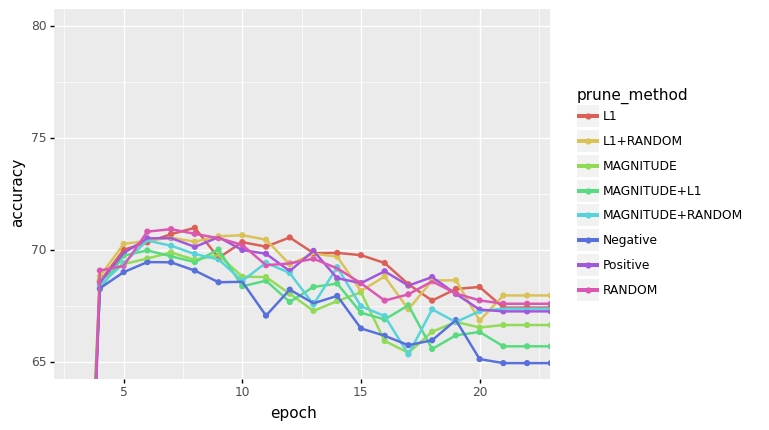

<ggplot: (8775661777240)>

In [170]:
dft = df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'VGG16')]
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_point()+ geom_smooth(method='auto', span=0.0, se=False, level=0.01)+ coord_cartesian(xlim=(3,22), ylim = (65,80))

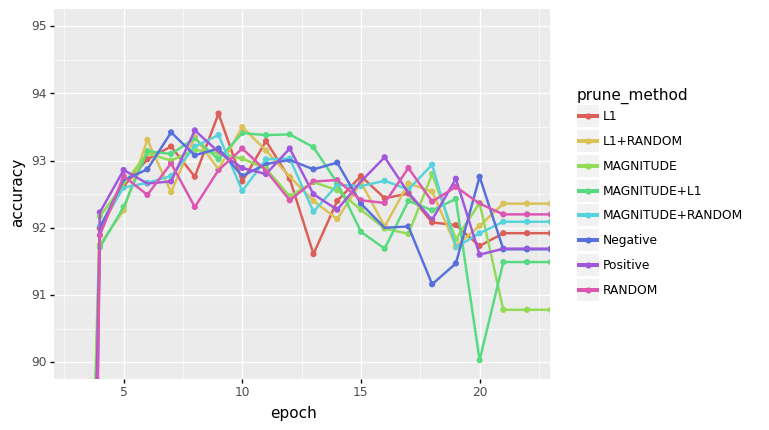

<ggplot: (8775661328195)>

In [135]:
dft = df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'RESNET50')]
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_point()+ geom_smooth(method='auto', span=0.0, se=False, level=0.01)+ coord_cartesian(xlim=(3,22), ylim = (90,95))

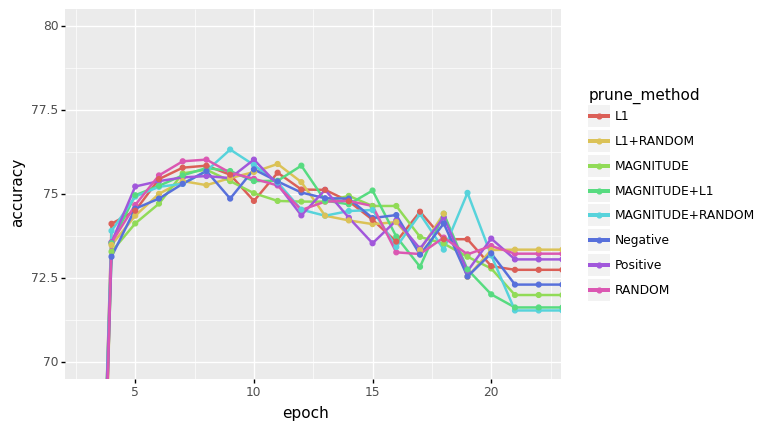

<ggplot: (8775661443952)>

In [141]:
dft = df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'RESNET50')]
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(xlim=(3,22), ylim = (70,80))

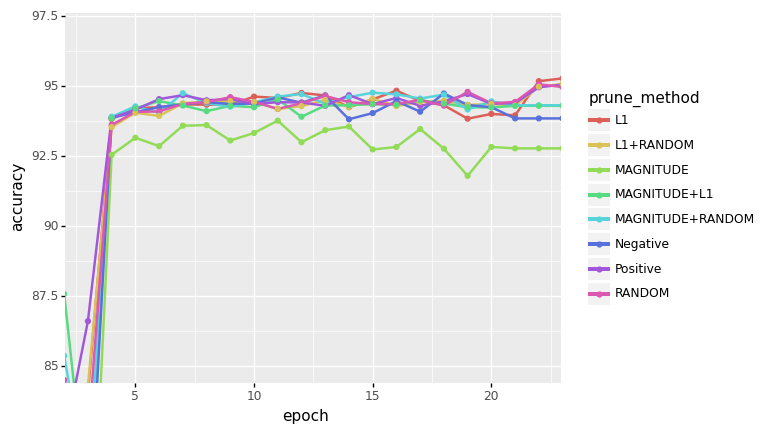

<ggplot: (8775661740846)>

In [145]:
dft = df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'DPN92')]
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(xlim=(3,22), ylim = (85,97))

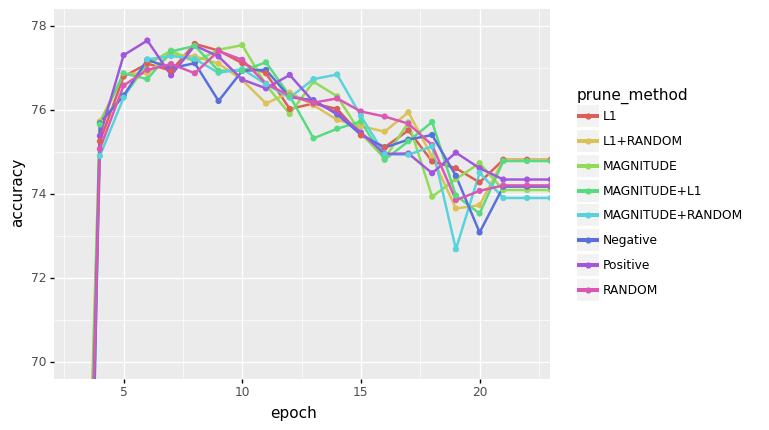

<ggplot: (8735808804663)>

In [26]:
dft = df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'DPN92')]
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(xlim=(3,22), ylim = (70,78))

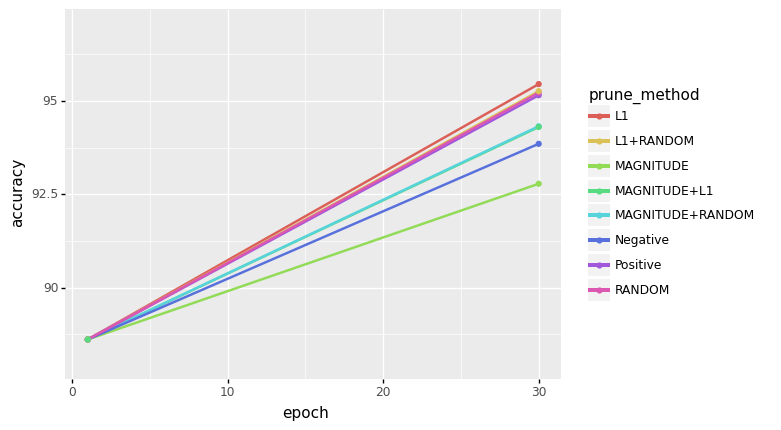

<ggplot: (8775661899093)>

In [173]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'DPN92') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'DPN92') &((df['epoch'] == 30))]])
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(ylim = (88,97))

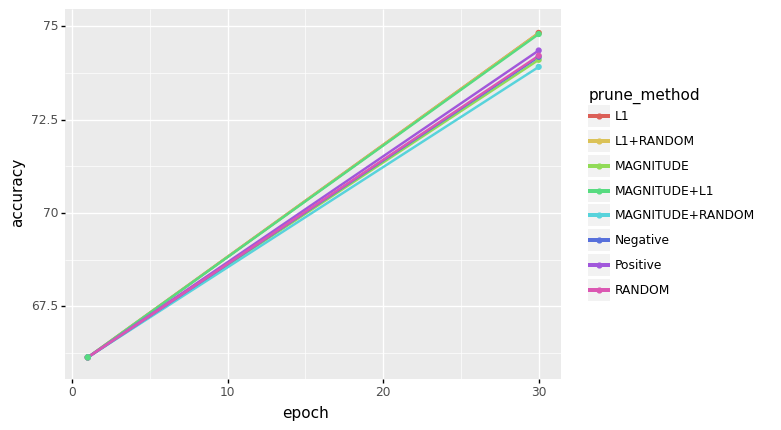

<ggplot: (8775661830154)>

In [181]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'DPN92') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'DPN92') &((df['epoch'] == 30))]])
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(ylim = (66,75))

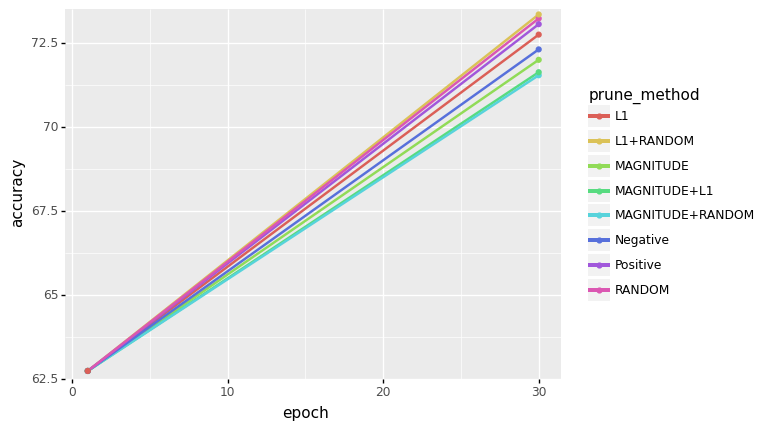

<ggplot: (8775664359786)>

In [187]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'RESNET50') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'RESNET50') &((df['epoch'] == 30))]])
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(ylim = (63,73))

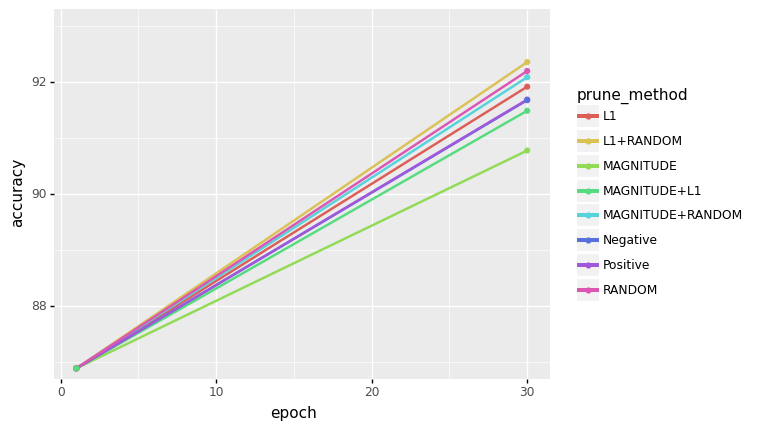

<ggplot: (8775659151324)>

In [185]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'RESNET50') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'RESNET50') &((df['epoch'] == 30))]])
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(ylim = (87,93))

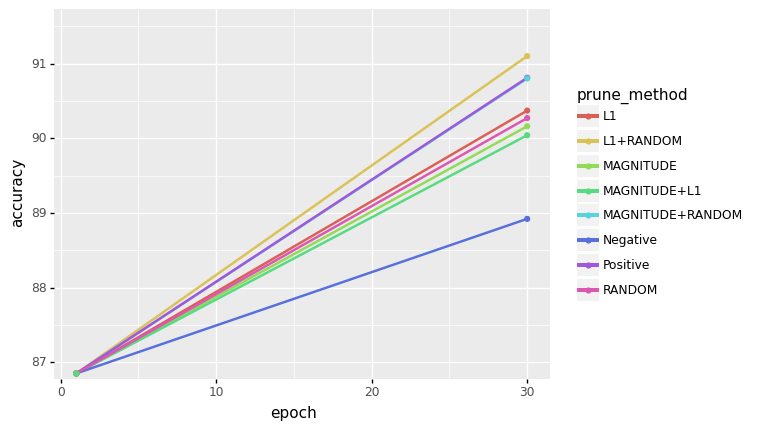

<ggplot: (8775661568820)>

In [189]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'VGG16') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar10') & (df['arch'] == 'VGG16') &((df['epoch'] == 30))]])
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(ylim = (87,91.5))

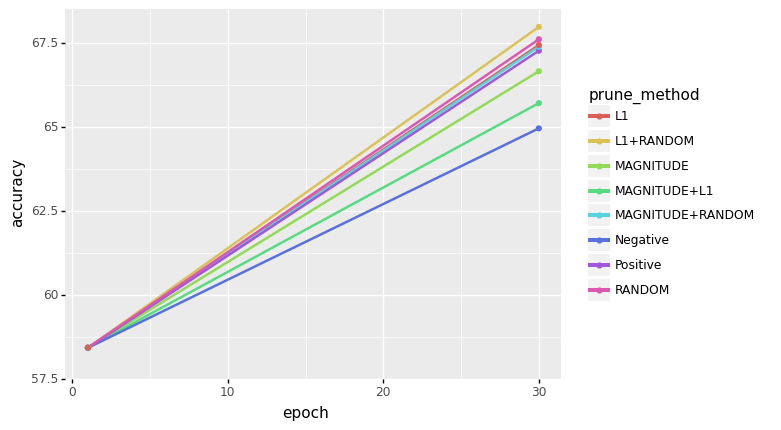

<ggplot: (8775661827307)>

In [194]:
dft = pd.concat([df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'VGG16') &((df['epoch'] == 1))],df.loc[(df['dataset'] == 'cifar100') & (df['arch'] == 'VGG16') &((df['epoch'] == 30))]])
ggplot(dft, aes(x='epoch', y='accuracy', color='prune_method'))+ geom_smooth(method='auto', span=0.0, se=False, level=0.01) + geom_point()+ coord_cartesian(ylim = (58,68))